In [1]:
import time
bytes_list_enc=[]
time_list_enc=[]
bytes_list_dec=[]
time_list_dec=[]

In [2]:
from tkinter import *
import base64
from tkinter import messagebox
import tkinter.font as font
from PIL import Image, ImageTk
import tkinter as tk
from cryptography.hazmat.primitives import padding
import binascii
import random
# st=0
# et=0
# no_of_bytes=0
# elapsed_time=0
#RSA Functions
#=============================================================
def totient(number): 
    if(prime(number)):
        return number-1
    else:
        return False

#def to check if a number is prime or not
def prime(num):
    if num == 2:
        return True
    # prime nums can't be less divisible by two (except 2)
    if num < 2 or num % 2 == 0:
        return False
    for n in range(3, int(num**0.5)+2, 2):
        if num % n == 0:
            return False
    return True

# generating e
def generate_E(num): 
    def mdc(n1,n2):
        rest = 1
        while(n2 != 0):
            rest = n1%n2
            n1 = n2
            n2 = rest
        return n1

    while True:
        e = random.randrange(2,num) 
        if(mdc(num,e) == 1):
            return e

#generating random prime numbers for p&q
def generate_prime(): 
    while True: 
        x=random.randrange(100,300) # define the range of the primes
        if(prime(x)==True):
            return x

# calc mod(a,b)
def mod(a,b):
    if(a<b):
        return a
    else:
        c=a%b
        return c

#encrypting words
def cipher(words,e,n): # get the words and compute the cipher
    enc=[]
    for word in words:
        k = word**e
        d = mod(k,n)
        enc.append(d)
    
        
    return enc

def mod_expon(x,a,n):
    result = 1
    x = x % n
    while a > 0:
        if (a % 2 == 1):
            result = (result * x) % n
        a = a >> 1
        x = (x * x) % n
    return result

def descifra(cifra,n,d):
    decrypt=[]
    for word in cifra:
        result = mod_expon(word,d,n)
#         texto = mod(result,n)
        decrypt.append(result)
    
    return decrypt
# calc d
def calculate_private_key(toti,e):
    d = 0
    while(mod(d*e,toti)!=1):
        d += 1
    return d



#=============================================================================================
#cms padding

def pad(data,size=512):
    padder = padding.PKCS7(size).padder()
    padded_data = padder.update(data)
    padded_data += padder.finalize()
    return(padded_data)


#cms unpadding

def unpad(data,size=512):
    padder = padding.PKCS7(size).unpadder()
    unpadded_data = padder.update(data)
    unpadded_data += padder.finalize()
    return(unpadded_data)
#==============================================================================================

def finalencrypt(p):
    st_enc = time.time()
    aa=['s','j','w','f','q','y','o','u','l','c','t','a','r','d','v','z','b','k','x','p','i','n','m','h','e','g']
#     s=input("Enter the text to encrypt:\n").upper()
    
    s=p.upper()
    print("INPUT TO ENCRYPT:\n",s)
#     print(type(s))
    s1=''
    for i in s:
        if i!=" ":
            #print(i)
            s1=s1+aa[ord(i)-65]
        else:
            s1=s1+" "
    print("\nAlpha-Numeric Scramble:")
    print(s1)
    no_of_bytes_enc=len(s1)
    val=str(s1)
    plaintext=val
    print("\nBefore padding:\n",plaintext)
    plaintext=pad(plaintext.encode())
    # print("\nBefore padding:\n",plaintext)
    c = binascii.hexlify(bytearray(plaintext))
    print("\nAfter padding (CMS):\n", c)
    #Ascii conversion
    n=str(c)
    op=''
    print("\nASCII :")
    for i in range(len(n)):
        if i!=len(n)-1:
            op+=str(ord(n[i]))+","
        else:
            op+=str(ord(n[i]))
#     print(op)
#     print(type(op))
    asciilist=[]
    asciilist=op.split(',')
    asciilist=[int(i) for i in asciilist]
    print(asciilist)
    
    p =223 #generate_prime()
    q =277 #generate_prime()
    n = p*q # compute N
    y = totient(p) # compute the totient of P
    x = totient(q) # compute the totient of Q
    totient_de_N = x*y # compute the totient of N
    e = 5  # generate_E(totient_de_N)# generate E
    public_key = (n, e)

    print('Your public key:', public_key)
    text_cipher = cipher(asciilist,e,n)
    print('Your encrypted message:', text_cipher)
    et_enc = time.time()
    elapsed_time_enc = et_enc - st_enc
    print('Execution time of encryption:', elapsed_time_enc, 'seconds')
    print('No of bytes in encryption: ',no_of_bytes_enc)
    bytes_list_enc.append(no_of_bytes_enc)
    time_list_enc.append(elapsed_time_enc)
#     print("text cipher++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++",type(text_cipher))
    return text_cipher



def finaldecrypt(c):
    st_dec = time.time()
    print("=============================================================================================================\n\n")
#     rsatoascii=input("Enter rsa encrypted:\n\n").split(',')
    rsatoascii=list(c.split(" "))
    no_of_bytes_dec=len(rsatoascii)
    rsatoascii=[int(i) for i in rsatoascii]
    
    p =223 #generate_prime()
    q =277 #generate_prime()
    n = p*q # compute N
    y = totient(p) # compute the totient of P
    x = totient(q) # compute the totient of Q
    totient_de_N = x*y # compute the totient of N
    e = 5  # generate_E(totient_de_N)# generate E
    public_key = (n, e)

    print('Your public key:', public_key)
    #text_cipher = cipher(text,e,n)
    #print('Your encrypted message:', text_cipher)
    
    d = 85781
    print('Your private key is:', d)
    original_text = descifra(rsatoascii,n,d)
#     print(type(original_text))
    print('rsa to ascii:', original_text)
    
    
    
    
   # n=input("Enter input to decrypt:\n\n").split(',')
    bcode=[]
    print("\nDecryption ASCII - CMS\n")
    for i in range(len(original_text)):
        print(chr(int(original_text[i])),end="")
        bcode.append(chr(int(original_text[i])))

    newl=''
    for ii in bcode:
        newl+=ii
    arr = bytes(newl, 'utf-8')


    decry=binascii.unhexlify(arr[2:len(arr)-1])
    print("\n\nCMS before unpadding:\n\n",decry)
# print(decry)
    cc = unpad(decry)
    print("\nCMS to Alpha-numeric Scrambling:\n\n",cc.decode())

#Reverse alphnumeric scrambling

    aa=['s','j','w','f','q','y','o','u','l','c','t','a','r','d','v','z','b','k','x','p','i','n','m','h','e','g']
    s2=''
    rs=str(cc.decode())
    for i in rs:
        if i!=" ":
            s2=s2+chr(aa.index(i)+65)
        else:
            s2=s2+" "

    print("\nAlpha - Numeric to Text:\n")
    print(s2)
    et_dec = time.time()
    elapsed_time_dec = et_dec - st_dec
    print('Execution time of decryption:', elapsed_time_dec, 'seconds')
    print('No of bytes in decryption: ',no_of_bytes_dec)
    bytes_list_dec.append(no_of_bytes_dec)
    time_list_dec.append(elapsed_time_dec)
    
    
    return s2

#==========================================================================================

#Function that executes on clicking Show Message function
def Result():
    p = Message.get()
    c = Message.get()
    #k= key.get()
    i = mode.get()
    if (i==1):
#         encryption_output=[]
#         encryption_output.append(finalencrypt(p))
        Output.set(finalencrypt(p))
        
        
    elif(i==2):
        Output.set(finaldecrypt(c))
    else:
        messagebox.showinfo('Please Choose one of Encryption or Decrption. Try again.')

#Function that executes on clicking Reset function
def Reset():
    Message.set("")
    #key.set("")
    mode.set(0)
    Output.set("")
    

#==============================================================================================
   
if __name__ == "__main__":
    wn = Tk()
    wn.geometry("1500x800")
    img =Image.open('E:\PICS\mnd81.png')
    bg = ImageTk.PhotoImage(img)
    wn.title("Ensuring Greater Security in Medical Records ")
    
    label8 = Label(wn, image=bg)
    label8.place(x = 0,y = 0)



    Message = StringVar()
#     key = StringVar()
    mode = IntVar()
    Output = StringVar()

    headingFrame1 = Frame(wn,bd=5,)
    headingFrame1.place(relx=0.08,rely=0.06,relwidth=0.9,relheight=0.21)

    headingLabel = Label(headingFrame1, text=" Ensuring Greater Security in Medical Records " ,font=('Courier',20,'bold'))

    headingLabel.place(relx=0,rely=0, relwidth=1, relheight=1)


    label1 = Label(wn, text='Enter the Message',font=('Courier',15,'bold'))
    label1.place(x=350,y=250)

    msg = Entry(wn,textvariable=Message,width=73,font=('Courier',15,'normal'))
    msg.place(x=600,y=250)

#     label2 = Label(wn, text='Enter the key',font=('Courier',15,'bold'))
#     label2.place(x=350,y=300)

#     InpKey = Entry(wn, textvariable=key,  width=73,font=('Courier',15,'normal'))
#     InpKey.place(x=600,y=300)

    label3 = Label(wn, text='Select one of encrypt or decrypt',font=('Courier',18,'bold'))
    label3.place(x=680,y=375)

    Radiobutton(wn, text='Encrypt',font=('Courier',17,'bold'),variable=mode, value=1).place(x=750,y=425) 
    Radiobutton(wn, text='Decrypt',font=('Courier',17,'bold'),variable=mode, value=2).place(x=900,y=425) 

    label3 = Label(wn, text='Result',font=('Courier',16,'bold'))
    label3.place(x=350,y=510)

    res = Entry(wn,textvariable=Output, width=86,font=('Courier',15,'normal'))
#     res=Text(wn,font=('calibre',12,'normal'))
#     res.insert(INSERT,Output)
    
    res.place(x=450,y=510)




    ShowBtn = Button(wn,text="Show Message",fg='black',width=15,height=1,command=Result)
    ShowBtn['font'] = font.font=('Courier', 18, 'bold')
    ShowBtn.place(x=550,y=600)

    ResetBtn = Button(wn, text='Reset',fg='black', width=15,height=1,command=Reset)
    ResetBtn['font'] = font.font=('Courier', 18, 'bold')
    ResetBtn.place(x=800,y=600)

    QuitBtn = Button(wn, text='Exit',fg='black',width=15,height=1, command=wn.destroy)
    QuitBtn['font'] = font.font=('Courier', 18, 'bold')
    QuitBtn.place(x=1050,y=600)
    


    wn.mainloop()
    
    

INPUT TO ENCRYPT:
 HELLO THIS IS YOUR DOCTOR GEORGE GIVE ME A CALL LATER  TODAY

Alpha-Numeric Scramble:
uqaav pulx lx evik fvwpvk oqvkoq olnq rq s wsaa aspqk  pvfse

Before padding:
 uqaav pulx lx evik fvwpvk oqvkoq olnq rq s wsaa aspqk  pvfse

After padding (CMS):
 b'75716161762070756c78206c78206576696b2066767770766b206f71766b6f71206f6c6e712072712073207773616120617370716b2020707666736504040404'

ASCII :
[98, 39, 55, 53, 55, 49, 54, 49, 54, 49, 55, 54, 50, 48, 55, 48, 55, 53, 54, 99, 55, 56, 50, 48, 54, 99, 55, 56, 50, 48, 54, 53, 55, 54, 54, 57, 54, 98, 50, 48, 54, 54, 55, 54, 55, 55, 55, 48, 55, 54, 54, 98, 50, 48, 54, 102, 55, 49, 55, 54, 54, 98, 54, 102, 55, 49, 50, 48, 54, 102, 54, 99, 54, 101, 55, 49, 50, 48, 55, 50, 55, 49, 50, 48, 55, 51, 50, 48, 55, 55, 55, 51, 54, 49, 54, 49, 50, 48, 54, 49, 55, 51, 55, 48, 55, 49, 54, 98, 50, 48, 50, 48, 55, 48, 55, 54, 54, 54, 55, 51, 54, 53, 48, 52, 48, 52, 48, 52, 48, 52, 39]
Your public key: (61771, 5)
Your encrypted message: [10454, 38

In [3]:
print(bytes_list_enc)
print(time_list_enc)
print(bytes_list_dec)
print(time_list_dec)

[50, 100, 150]
[0.0008749961853027344, 0.001926422119140625, 0.0025625228881835938]
[131, 259, 387]
[16.202327489852905, 49.09207797050476, 72.27070212364197]


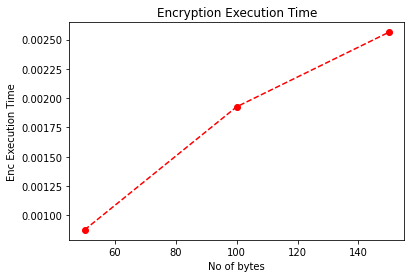

In [4]:
import matplotlib.pyplot as plt
# x axis values
x = bytes_list_enc
# corresponding y axis values
y = time_list_enc

plt.plot(x, y, color="red", marker="o",  linestyle="--")
  
# naming the x axis
plt.xlabel('No of bytes')
# naming the y axis
plt.ylabel('Enc Execution Time')
plt.title('Encryption Execution Time')
  
# function to show the plot
plt.show()

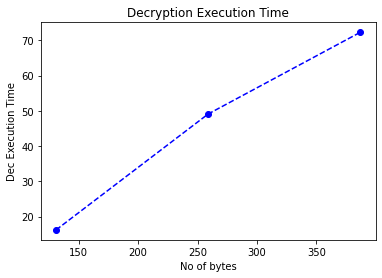

In [5]:
# x axis values
x = bytes_list_dec
# corresponding y axis values
y = time_list_dec

plt.plot(x, y, color="blue", marker="o",  linestyle="--")
  
# naming the x axis
plt.xlabel('No of bytes')
# naming the y axis
plt.ylabel('Dec Execution Time')
plt.title('Decryption Execution Time')
  
# function to show the plot
plt.show()